## Week 9 Capstone Work

For Week 9, include ideas such as gradient boost, learning rate, number of estimators, tree depth, and regularization.

In [1]:
# Imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, root_mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# Read in previous data
team = pd.read_csv('data/cleaned/teamstats_eng.csv', sep=',', header=0)
wr = pd.read_csv('data/cleaned/wr_eng.csv', sep=',', header=0)

# Team stats to predict inj
X_team = team.drop(columns=['year', 'team', 'wins', 'losses', 'injuries']).copy()
y_team = team['injuries'].copy()
scores_team = []

# Team stats to predict win_loss_perc
X_team2 = team.drop(columns=['year', 'team', 'wins', 'losses', 'win_loss_perc']).copy()
y_team2 = team['win_loss_perc'].copy()
scores_team2 = []

# wr play by play stats to predict injury duration
X_wr = wr.drop(columns=['Injury_Duration']).copy()
y_wr = wr['Injury_Duration'].copy()
scores_wr = []

## Gradient Boost

In [3]:
def graph_param_RMSE(param, values, X, y):

    scores = []
    for i in values:
        model = GradientBoostingRegressor(**{param: i})
        scores.append(np.sqrt(-cross_val_score(model, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=3, random_state=42), scoring='neg_mean_squared_error').mean()))

    plt.figure(figsize=(10, 5))
    plt.plot(values, scores)
    plt.xlabel(param)
    plt.ylabel('RMSE')
    plt.title(f'{param} vs RMSE')
    plt.show()
    return values[scores.index(min(scores))]

Team

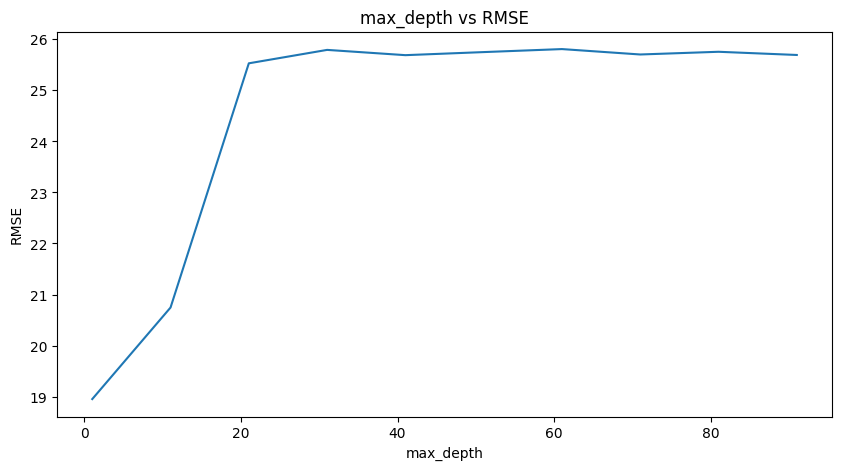

1

In [4]:
param = 'max_depth'
values = range(1, 100, 10)

team_max_depth = graph_param_RMSE(param, values, X_team, y_team)
team_max_depth

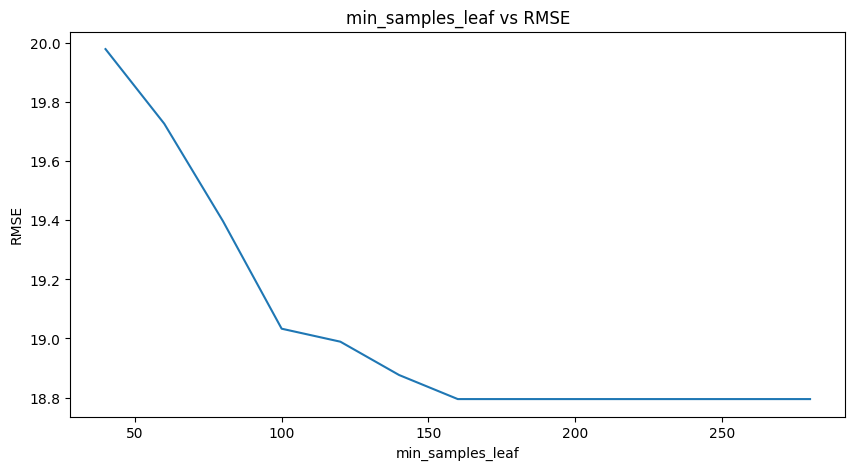

160

In [5]:
param = 'min_samples_leaf'
values = range(40, 300, 20)

team_min_samp_leaf = graph_param_RMSE(param, values, X_team, y_team)
team_min_samp_leaf

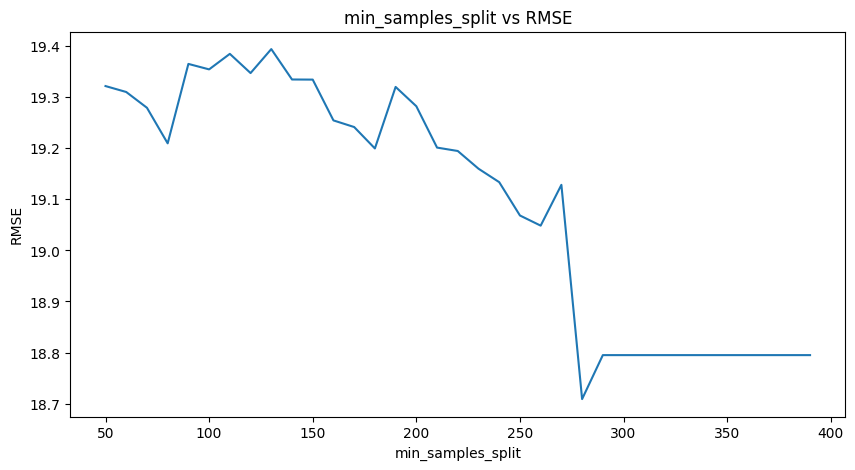

280

In [6]:
param = 'min_samples_split'
values = range(50, 400, 10)

team_min_samp_split = graph_param_RMSE(param, values, X_team, y_team)
team_min_samp_split

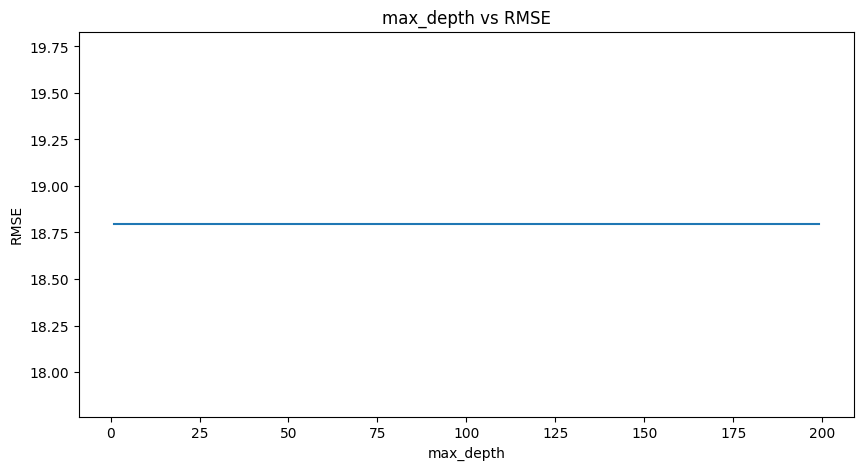

1

In [7]:
param = 'max_depth'
values = range(1, 200, 1)
scores = []
for i in values:
    model = DecisionTreeRegressor(**{param: i, 'min_samples_split': 280, 'min_samples_leaf': 160})
    scores.append(np.sqrt(-cross_val_score(model, X_team, y_team, cv=RepeatedKFold(n_splits=5, n_repeats=3, random_state=42), scoring='neg_mean_squared_error').mean()))

plt.figure(figsize=(10, 5))
plt.plot(values, scores)
plt.xlabel(param)
plt.ylabel('RMSE')
plt.title(f'{param} vs RMSE')
plt.show()
values[scores.index(min(scores))]

Team2

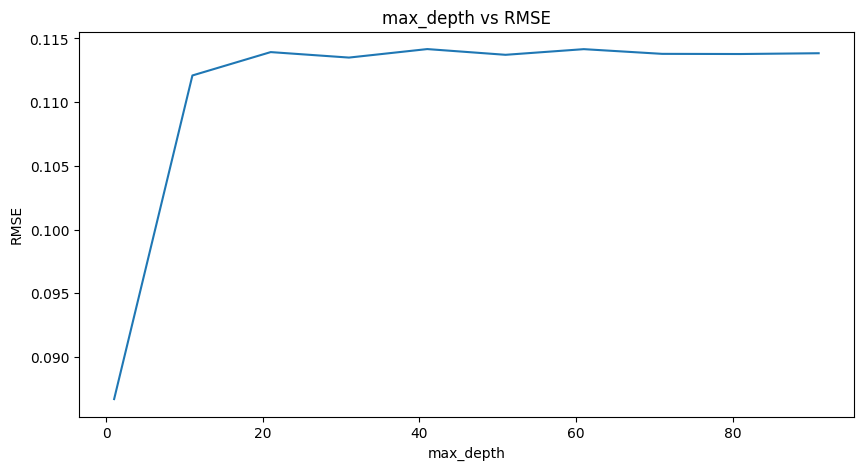

1

In [8]:
param = 'max_depth'
values = range(1, 100, 10)

team2_max_depth = graph_param_RMSE(param, values, X_team2, y_team2)
team2_max_depth

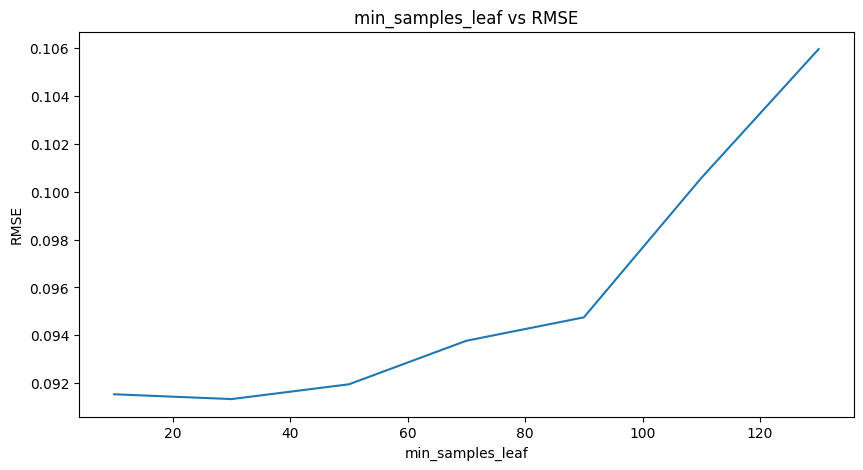

30

In [9]:
param = 'min_samples_leaf'
values = range(10, 150, 20)

team2_min_samp_leaf = graph_param_RMSE(param, values, X_team2, y_team2)
team2_min_samp_leaf

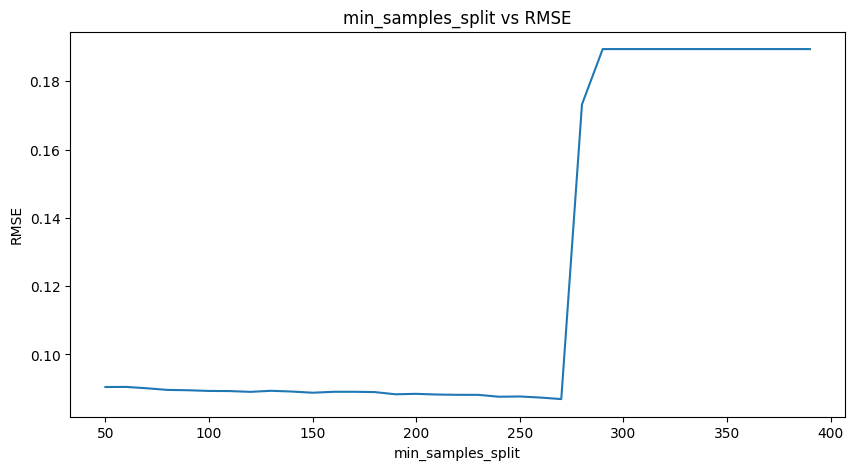

270

In [10]:
param = 'min_samples_split'
values = range(50, 400, 10)

team2_min_samp_split = graph_param_RMSE(param, values, X_team2, y_team2)
team2_min_samp_split

In [11]:
team2_param_grid = {'max_depth': [3, 5, 7, 9], 'min_samples_leaf': [20, 25, 30, 35, 40], 'min_samples_split': [50, 55, 60, 65]}

team2_gs = GridSearchCV(GradientBoostingRegressor(), team2_param_grid, scoring='neg_mean_squared_error', cv=RepeatedKFold(n_splits=5, n_repeats=2, random_state=42))
team2_gs.fit(X_team2, y_team2)

print("Params:", team2_gs.best_params_)
print("RMSE:", np.sqrt(-team2_gs.best_score_))

Params: {'max_depth': 3, 'min_samples_leaf': 25, 'min_samples_split': 65}
RMSE: 0.09132867516625605


WR

In [ ]:
param = 'max_depth'
values = range(1, 300, 20)

wr_max_depth = graph_param_RMSE(param, values, X_wr, y_wr)
wr_max_depth

In [ ]:
param = 'min_samples_leaf'
values = range(1, 20, 2)

wr_min_samp_leaf = graph_param_RMSE(param, values, X_wr, y_wr)
wr_min_samp_leaf

In [ ]:
param = 'min_samples_split'
values = range(2, 20, 2)

wr_min_samp_split = graph_param_RMSE(param, values, X_wr, y_wr)
wr_min_samp_split

In [ ]:
wr_param_grid = {'max_depth': [10, 11, 12, 13, 14, 15], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [1, 2, 3, 5]}

wr_gs = GridSearchCV(GradientBoostingRegressor(), wr_param_grid, scoring='neg_mean_squared_error', cv=RepeatedKFold(n_splits=5, n_repeats=2, random_state=42))
wr_gs.fit(X_wr, y_wr)

print("Params:", wr_gs.best_params_)
print("RMSE:", np.sqrt(-wr_gs.best_score_))